In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
Data_Salary = pd.read_csv('/Users/sreelekha.santhanam/Downloads/Capstone_project/salaries.csv')
Data_Salary.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Data Scientist,120000,USD,120000,AU,0,AU,S
1,2024,MI,FT,Data Scientist,70000,USD,70000,AU,0,AU,S
2,2024,MI,CT,Data Scientist,130000,USD,130000,US,0,US,M
3,2024,MI,CT,Data Scientist,110000,USD,110000,US,0,US,M
4,2024,MI,FT,Data Science Manager,240000,USD,240000,US,0,US,M


In [3]:
# Checking for missing values
missing_values = Data_Salary.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Getting data types of each column
data_types = Data_Salary.dtypes
print("\nData types of each column:")
print(data_types)

Missing values in each column:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Data types of each column:
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object


In [4]:
# Basic statistics of the dataset
basic_stats = Data_Salary.describe()
print("\nBasic statistics of the dataset:")
print(basic_stats)


Basic statistics of the dataset:
          work_year        salary  salary_in_usd  remote_ratio
count  16494.000000  1.649400e+04   16494.000000  16494.000000
mean    2023.224991  1.637878e+05  149713.575725     32.044986
std        0.713405  3.406017e+05   68516.136918     46.260201
min     2020.000000  1.400000e+04   15000.000000      0.000000
25%     2023.000000  1.020000e+05  101517.500000      0.000000
50%     2023.000000  1.422000e+05  141300.000000      0.000000
75%     2024.000000  1.873422e+05  185900.000000    100.000000
max     2024.000000  3.040000e+07  800000.000000    100.000000


Exploratory Data Analysis (EDA)

We begin our exploratory data analysis by visualizing the distribution of various features. This helps us understand the overall structure and trends in the dataset.

Distribution of Salaries in USD
We analyze the distribution of salaries to understand the spread and central tendency.



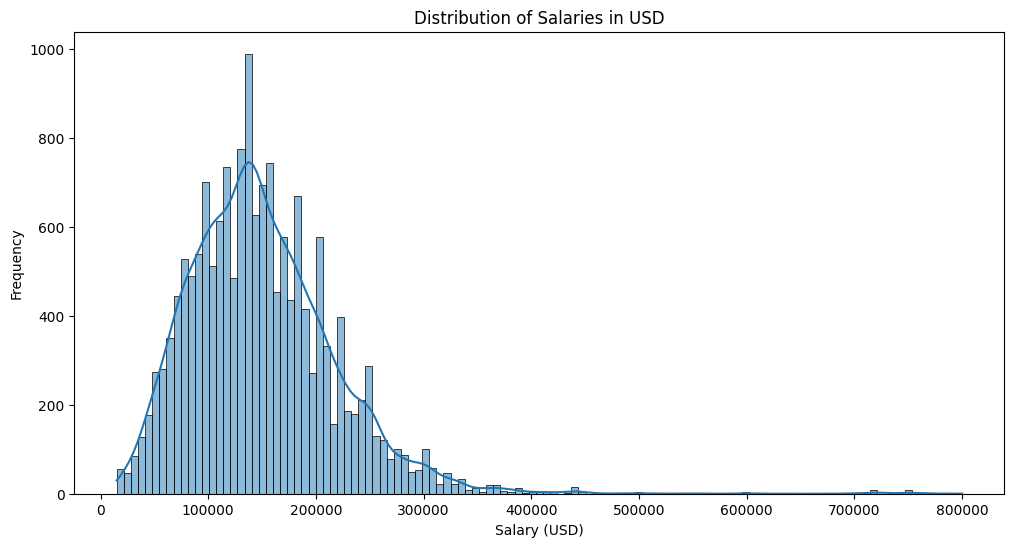

In [5]:
plt.figure(figsize=(12, 6))
sns.histplot(Data_Salary['salary_in_usd'], kde=True)
plt.title('Distribution of Salaries in USD')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.show()

Distribution of Top 20 Job Titles
We analyze the distribution of the top 20 job titles to avoid overcrowding and better visualize the most common roles in the dataset.

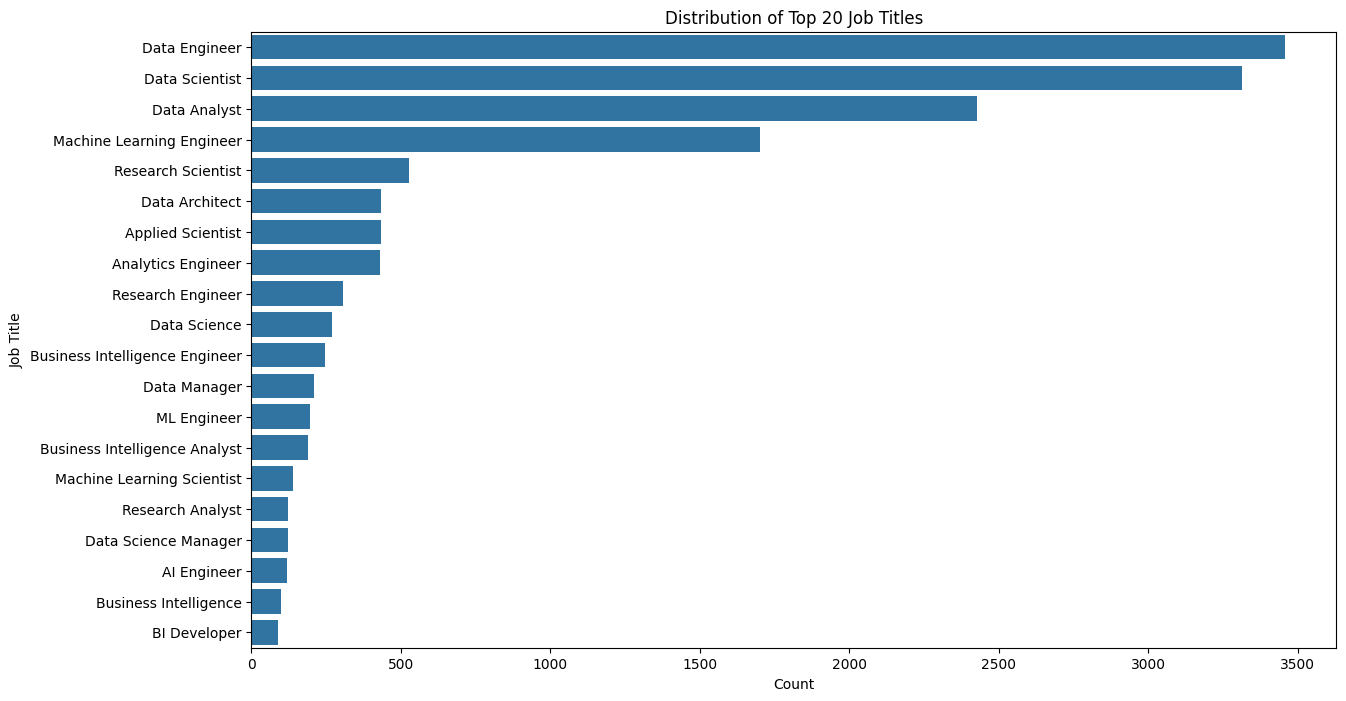

In [6]:
plt.figure(figsize=(14, 8))
top_20_job_titles = Data_Salary['job_title'].value_counts().nlargest(20).index
sns.countplot(y='job_title', data=Data_Salary, order=top_20_job_titles)
plt.title('Distribution of Top 20 Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()

Salary Distribution by Experience Level
We explore the salary distribution across different experience levels to see how experience impacts salary.

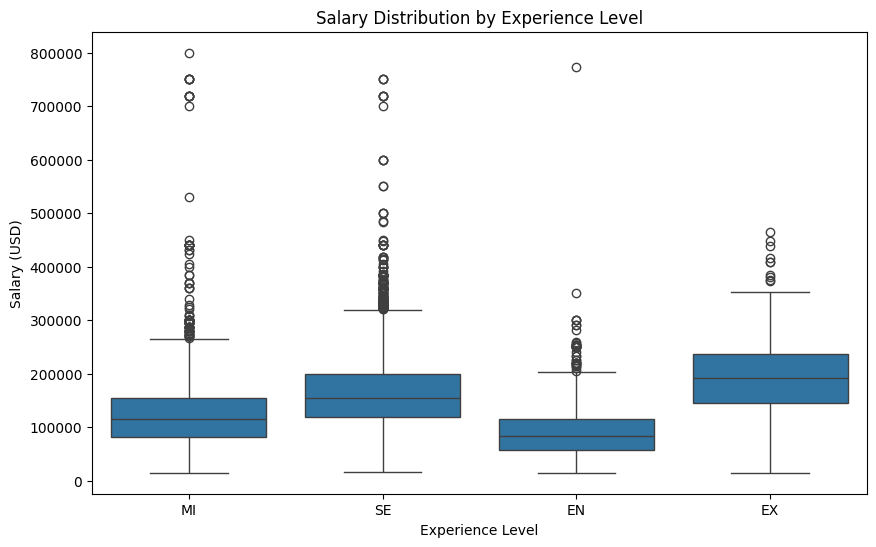

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=Data_Salary, x='experience_level', y='salary_in_usd')
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.show()

Salary Distribution by Employment Type
We analyze the salary distribution across different types of employment to see if there's any significant difference.



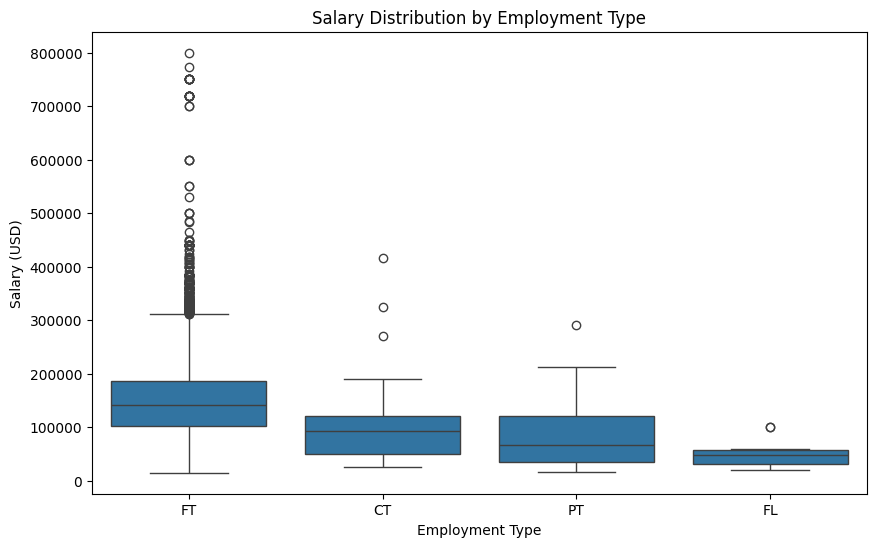

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=Data_Salary, x='employment_type', y='salary_in_usd')
plt.title('Salary Distribution by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Salary (USD)')
plt.show()

Simple Correlation Analysis
We compute the correlation matrix to understand the relationships between salary_in_usd and other numeric features. The correlation coefficient ranges from -1 to 1, where:

1 indicates a strong positive correlation.
-1 indicates a strong negative correlation.
0 indicates no correlation.

In [9]:
# One-Hot Encode categorical columns
categorical_cols = Data_Salary.select_dtypes(include=['object']).columns
Data_Salary_encoded = pd.get_dummies(Data_Salary, columns=categorical_cols, drop_first=True)

# Simple correlation analysis with encoded data
correlation_matrix = Data_Salary_encoded.corr()
salary_correlation = correlation_matrix['salary_in_usd'].sort_values(ascending=False)

print("Correlation of numerical features with salary_in_usd:")
print(salary_correlation)

Correlation of numerical features with salary_in_usd:
salary_in_usd             1.000000
salary_currency_USD       0.320635
employee_residence_US     0.289471
company_location_US       0.283235
experience_level_SE       0.275531
                            ...   
company_location_GB      -0.172785
experience_level_MI      -0.197889
salary_currency_GBP      -0.202210
salary_currency_EUR      -0.209731
job_title_Data Analyst   -0.253435
Name: salary_in_usd, Length: 351, dtype: float64


Outlier Analysis
We use boxplots to visualize outliers in the salary data. Outliers can significantly impact the analysis and predictive modeling, so it's essential to identify and handle them appropriately.

The Interquartile Range (IQR) method is used to identify outliers:

Q1: 25th percentile
Q3: 75th percentile
IQR = Q3 - Q1
Outliers are defined as data points below Q1 - 1.5 IQR or above Q3 + 1.5 IQR.

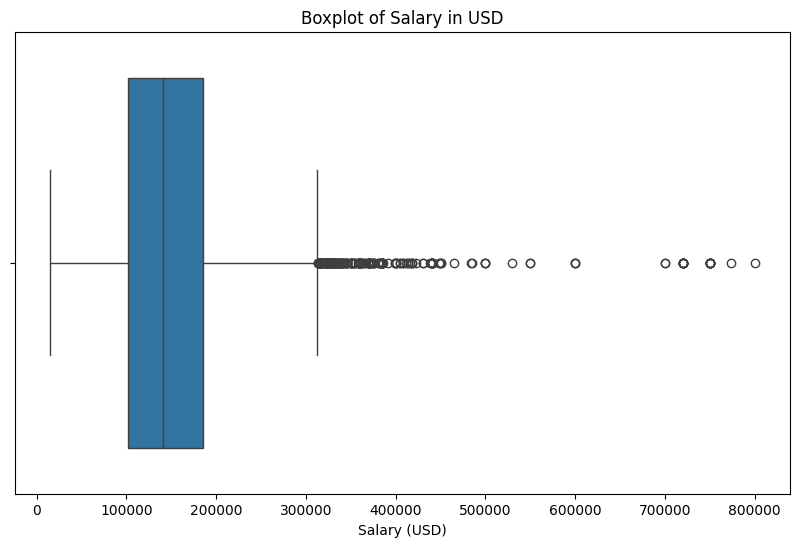

Number of outliers detected: 284


In [10]:
# Boxplot to visualize outliers in 'salary_in_usd'
plt.figure(figsize=(10, 6))
sns.boxplot(x=Data_Salary['salary_in_usd'])
plt.title('Boxplot of Salary in USD')
plt.xlabel('Salary (USD)')
plt.show()

# Identifying outliers using IQR method
Q1 = Data_Salary['salary_in_usd'].quantile(0.25)
Q3 = Data_Salary['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1
outliers = Data_Salary[(Data_Salary['salary_in_usd'] < (Q1 - 1.5 * IQR)) | (Data_Salary['salary_in_usd'] > (Q3 + 1.5 * IQR))]
non_outliers = Data_Salary[~((Data_Salary['salary_in_usd'] < (Q1 - 1.5 * IQR)) | (Data_Salary['salary_in_usd'] > (Q3 + 1.5 * IQR)))]
print("Number of outliers detected:", len(outliers))

Advanced Visualizations
Violin Plot of Salary by Experience Level
Violin plots are used to visualize the distribution of salaries across different experience levels. Unlike boxplots, violin plots also show the kernel density estimate, which helps in understanding the distribution shape.

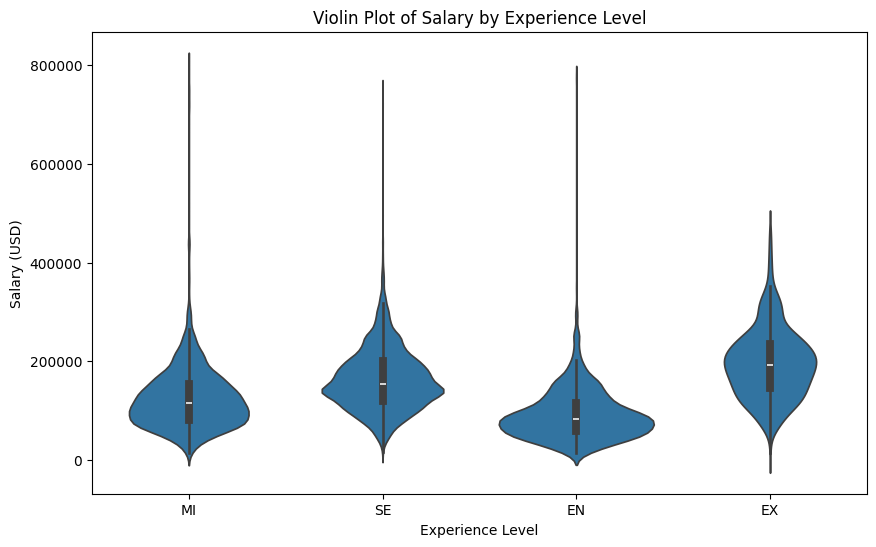

In [11]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=Data_Salary['experience_level'], y=Data_Salary['salary_in_usd'])
plt.title('Violin Plot of Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.show()

Feature Importance Using Random Forest
We use a Random Forest model to determine the importance of various features in predicting salaries. Feature importance helps in identifying which features have the most influence on the target variable.

Random Forest is an ensemble learning method that operates by constructing multiple decision trees during training and outputting the mean prediction of the individual trees.

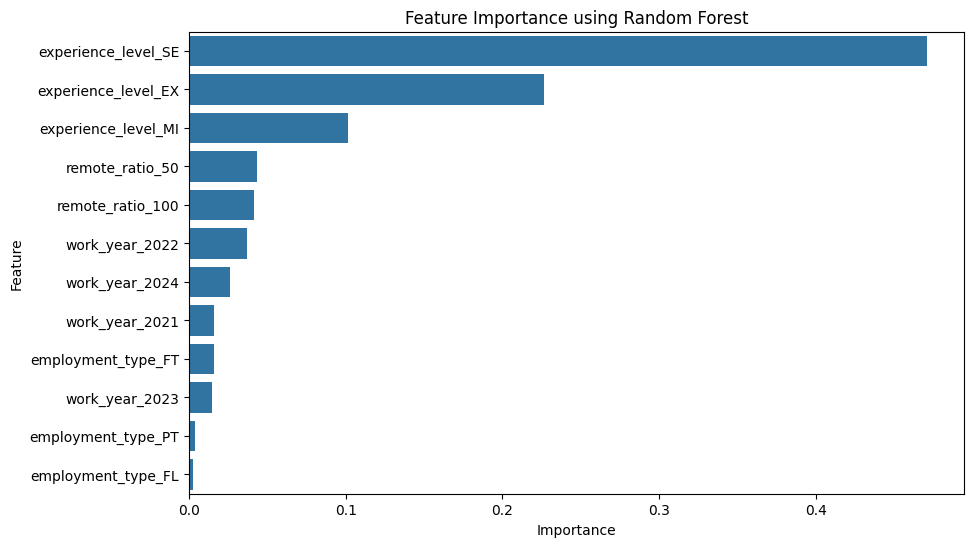

In [12]:
# Ensure necessary libraries are imported
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Prepare data for modeling
features = ['work_year', 'experience_level', 'employment_type', 'remote_ratio']
Data_Salary_encoded = pd.get_dummies(Data_Salary, columns=features, drop_first=True)
X = Data_Salary_encoded.drop(['salary', 'salary_in_usd', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size'], axis=1)
y = Data_Salary_encoded['salary_in_usd']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'])
plt.title('Feature Importance using Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Predictive Modeling: Random Forest¶
We use the Random Forest model to predict salaries based on various features. The performance of the model is evaluated using Mean Absolute Error (MAE) and R-squared (R²) metrics.

Mean Absolute Error (MAE): Measures the average magnitude of errors in a set of predictions, without considering their direction.
R-squared (R²): Represents the proportion of the variance for the dependent variable that's explained by the independent variables in the model.

In [14]:
# Predictive Modeling: Random Forest
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 47242.51212522911
R-squared (R²): 0.14659079154491517


Simple Correlation Analysis¶
We compute the correlation matrix to understand the relationships between salary_in_usd and other numeric features. The correlation coefficient ranges from -1 to 1, where:

1 indicates a strong positive correlation.
-1 indicates a strong negative correlation.
0 indicates no correlation.

In [15]:
# One-Hot Encode categorical columns
categorical_cols = Data_Salary.select_dtypes(include=['object']).columns
Data_Salary_encoded = pd.get_dummies(Data_Salary, columns=categorical_cols, drop_first=True)

# Simple correlation analysis with encoded data
correlation_matrix = Data_Salary_encoded.corr()
salary_correlation = correlation_matrix['salary_in_usd'].sort_values(ascending=False)

print("Correlation of numerical features with salary_in_usd:")
print(salary_correlation)

Correlation of numerical features with salary_in_usd:
salary_in_usd             1.000000
salary_currency_USD       0.320635
employee_residence_US     0.289471
company_location_US       0.283235
experience_level_SE       0.275531
                            ...   
company_location_GB      -0.172785
experience_level_MI      -0.197889
salary_currency_GBP      -0.202210
salary_currency_EUR      -0.209731
job_title_Data Analyst   -0.253435
Name: salary_in_usd, Length: 351, dtype: float64


Outlier Analysis
We use boxplots to visualize outliers in the salary data. Outliers can significantly impact the analysis and predictive modeling, so it's essential to identify and handle them appropriately.

The Interquartile Range (IQR) method is used to identify outliers:

Q1: 25th percentile
Q3: 75th percentile
IQR = Q3 - Q1
Outliers are defined as data points below Q1 - 1.5 IQR or above Q3 + 1.5 IQR.

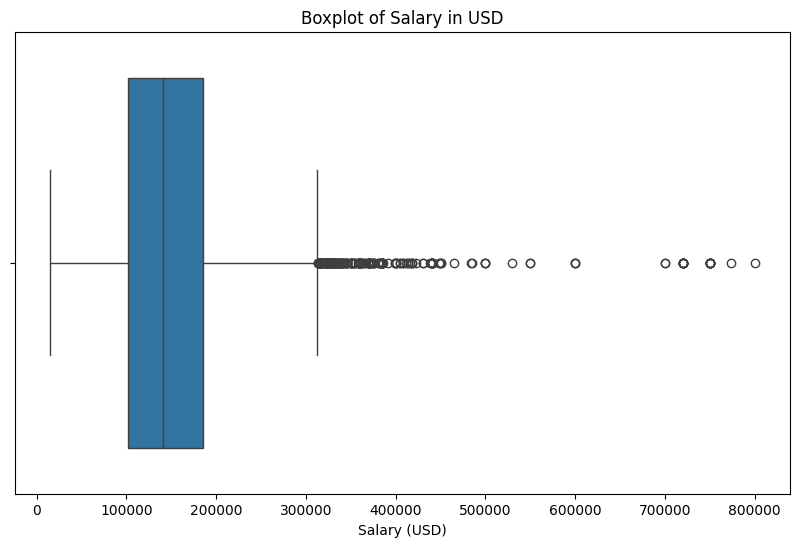

Number of outliers detected: 284


In [16]:
# Boxplot to visualize outliers in 'salary_in_usd'
plt.figure(figsize=(10, 6))
sns.boxplot(x=Data_Salary['salary_in_usd'])
plt.title('Boxplot of Salary in USD')
plt.xlabel('Salary (USD)')
plt.show()

# Identifying outliers using IQR method
Q1 = Data_Salary['salary_in_usd'].quantile(0.25)
Q3 = Data_Salary['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1
outliers = Data_Salary[(Data_Salary['salary_in_usd'] < (Q1 - 1.5 * IQR)) | (Data_Salary['salary_in_usd'] > (Q3 + 1.5 * IQR))]
non_outliers = Data_Salary[~((Data_Salary['salary_in_usd'] < (Q1 - 1.5 * IQR)) | (Data_Salary['salary_in_usd'] > (Q3 + 1.5 * IQR)))]
print("Number of outliers detected:", len(outliers))

Advanced Visualizations¶
Violin Plot of Salary by Experience Level
Violin plots are used to visualize the distribution of salaries across different experience levels. Unlike boxplots, violin plots also show the kernel density estimate, which helps in understanding the distribution shape.

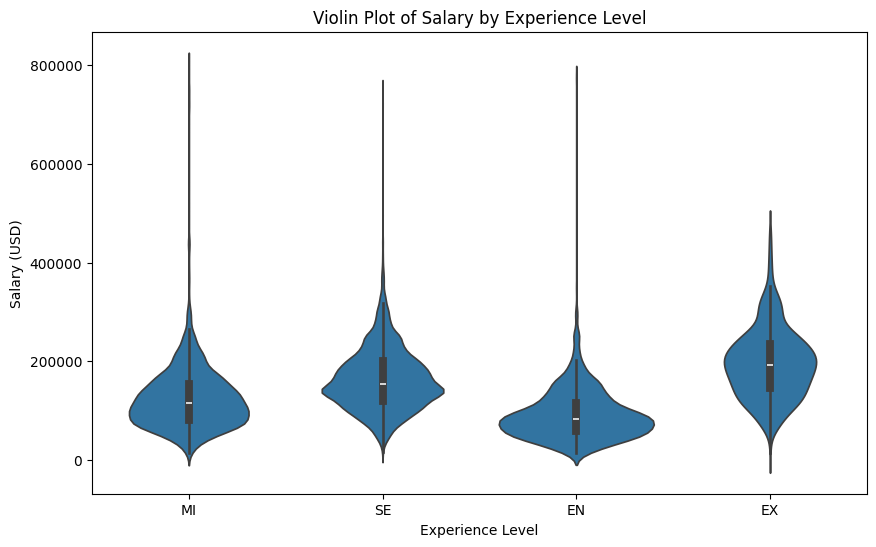

In [17]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=Data_Salary['experience_level'], y=Data_Salary['salary_in_usd'])
plt.title('Violin Plot of Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.show()

Feature Importance Using Random Forest¶
We use a Random Forest model to determine the importance of various features in predicting salaries. Feature importance helps in identifying which features have the most influence on the target variable.

Random Forest is an ensemble learning method that operates by constructing multiple decision trees during training and outputting the mean prediction of the individual trees.

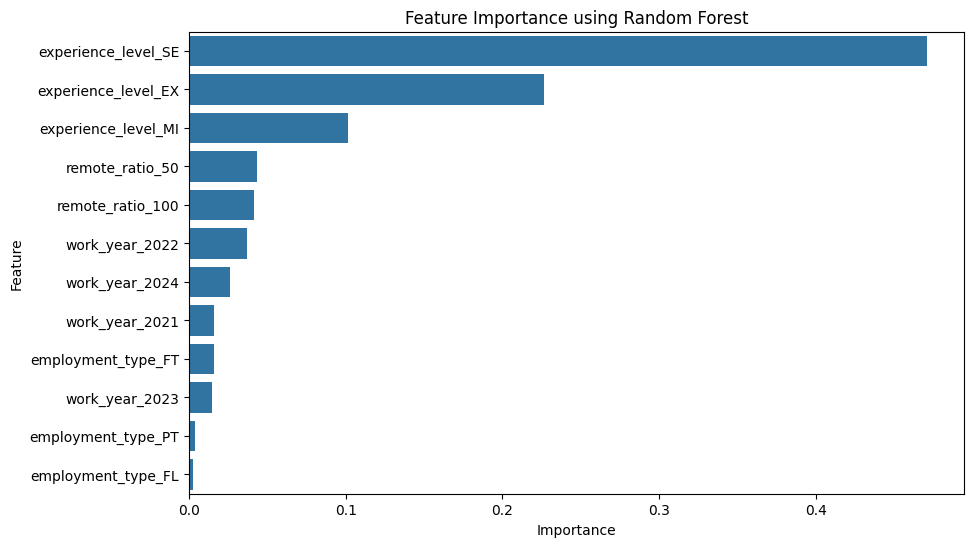

In [18]:
# Ensure necessary libraries are imported
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Prepare data for modeling
features = ['work_year', 'experience_level', 'employment_type', 'remote_ratio']
Data_Salary_encoded = pd.get_dummies(Data_Salary, columns=features, drop_first=True)
X = Data_Salary_encoded.drop(['salary', 'salary_in_usd', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size'], axis=1)
y = Data_Salary_encoded['salary_in_usd']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'])
plt.title('Feature Importance using Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Predictive Modeling: Random Forest¶
We use the Random Forest model to predict salaries based on various features. The performance of the model is evaluated using Mean Absolute Error (MAE) and R-squared (R²) metrics.

Mean Absolute Error (MAE): Measures the average magnitude of errors in a set of predictions, without considering their direction.
R-squared (R²): Represents the proportion of the variance for the dependent variable that's explained by the independent variables in the model.

In [19]:
# Predictive Modeling: Random Forest
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 47242.51212522911
R-squared (R²): 0.14659079154491517
